In [2]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
df = pd.read_csv("Resources/time_df.csv")
df

,movie_name,Country,Released,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,Month,Year
0,Madea's Family Reunion,USA,24-02-2006,5.2,45.0,26%,10000000,63257940,62581,PG-13,Comedy,63320521,633.21%,Feb,2006
1,Krrish,India,23-06-2006,6.4,68.0,88%,10000000,1430721,31000000,Not Rated,Action,32430721,324.31%,Jun,2006
2,End of the Spear,USA,20-01-2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%,Jan,2006
3,A Prairie Home Companion,USA,09-06-2006,6.7,75.0,81%,10000000,20342852,6373339,PG-13,Comedy,26716191,267.16%,Jun,2006
4,Saw III,"Canada, USA",27-10-2006,6.2,48.0,28%,10000000,80238724,83638091,R,Horror,163876815,1638.77%,Oct,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,Widows,"UK, USA",16-11-2018,8.0,49.0,79%,40000000,42402632,31463456,R,Thriller/Suspense,73866088,184.67%,Nov,2018
1822,Instant Family,USA,16-11-2018,7.2,61.0,65%,48000000,67363237,47127851,PG-13,Comedy,114491088,238.52%,Nov,2018
1823,The Mule,"USA, Canada",14-12-2018,7.3,84.0,88%,50000000,103678298,47511103,R,Drama,151189401,302.38%,Dec,2018
1824,Creed II,USA,21-11-2018,7.3,60.0,97%,50000000,115704387,96950000,PG-13,Drama,212654387,425.31%,Nov,2018


In [4]:
#Creating Dataframes for each month
jan_df = df.loc[df["Month"] == "Jan"]
feb_df = df.loc[df["Month"] == "Feb"]
mar_df = df.loc[df["Month"] == "Mar"]
apr_df = df.loc[df["Month"] == "Apr"]
may_df = df.loc[df["Month"] == "May"]
jun_df = df.loc[df["Month"] == "Jun"]
jul_df = df.loc[df["Month"] == "Jul"]
aug_df = df.loc[df["Month"] == "Aug"]
sep_df = df.loc[df["Month"] == "Sep"]
oct_df = df.loc[df["Month"] == "Oct"]
nov_df = df.loc[df["Month"] == "Nov"]
dec_df = df.loc[df["Month"] == "Dec"]

jan_df

,movie_name,Country,Released,IMDB Rating,Metascore,TomatoMeter,production_budget,domestic_box_office,international_box_office,rating,genre,Total Box Office,ROI,Month,Year
2,End of the Spear,USA,20-01-2006,6.8,45.0,41%,10000000,11748661,175380,PG-13,Drama,11924041,119.24%,Jan,2006
30,Pan's Labyrinth,"Mexico, Spain",19-01-2007,8.2,98.0,95%,16000000,37634615,49406954,R,Horror,87041569,544.01%,Jan,2007
45,The Painted Veil,"China, USA, Canada",19-01-2007,7.5,69.0,74%,19400000,8060487,7058308,PG-13,Drama,15118795,77.93%,Jan,2007
61,BloodRayne,"Germany, USA",06-01-2006,2.9,18.0,4%,25000000,2405420,1306213,R,Action,3711633,14.85%,Jan,2006
64,Nanny McPhee,"USA, UK, France",27-01-2006,6.5,59.0,73%,25000000,47279279,81466299,PG,Adventure,128745578,514.98%,Jan,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1753,The Upside,USA,11-01-2019,5.1,35.0,16%,37500000,103386274,10800000,PG-13,Comedy,114186274,304.50%,Jan,2019
1761,The Post,"USA, UK",12-01-2018,6.8,79.0,33%,50000000,81903458,97845422,PG-13,Drama,179748880,359.50%,Jan,2018
1771,Maze Runner: The Death Cure,USA,26-01-2018,6.0,30.0,87%,61000000,58032443,207846093,PG-13,Thriller/Suspense,265878536,435.87%,Jan,2018
1811,Nobody's Fool,USA,13-01-1995,8.2,69.0,65%,19000000,31713110,876383,R,Drama,32589493,171.52%,Jan,1995


The correlation coefficient is 0.5
The linear regression line equation is y = 2.03x + 17918152.11


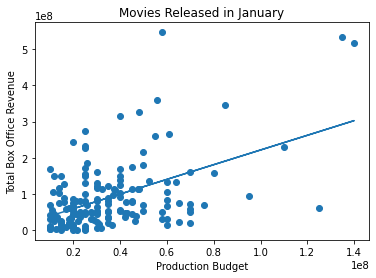

In [5]:
#Comparing box office revenue and production budget for movies released in January
xg = jan_df["production_budget"]
yg = jan_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in January")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.59
The linear regression line equation is y = 2.93x + -3030894.21


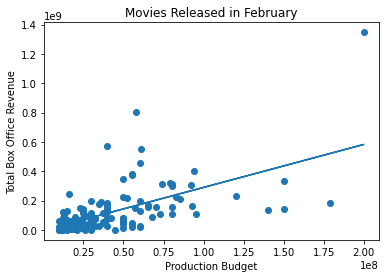

In [6]:
#Febuary Comparison
xg = feb_df["production_budget"]
yg = feb_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in February")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.76
The linear regression line equation is y = 2.74x + -10032298.79


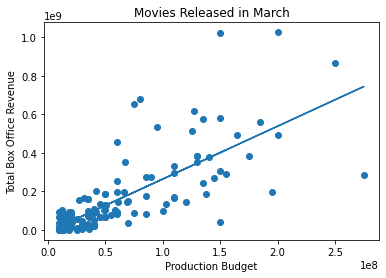

In [7]:
#March Comparison
xg = mar_df["production_budget"]
yg = mar_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in March")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.89
The linear regression line equation is y = 5.36x + -101180452.23


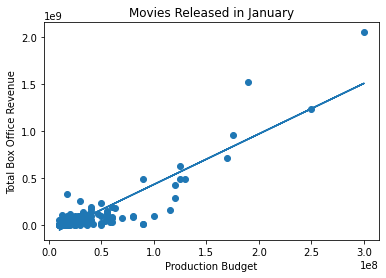

In [36]:
#April Comparison
xg = apr_df["production_budget"]
yg = apr_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in April")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.82
The linear regression line equation is y = 3.18x + -13865692.63


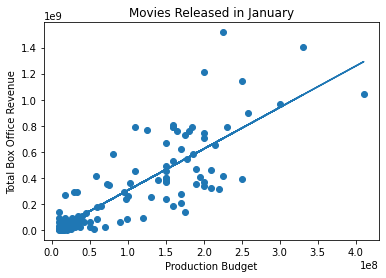

In [35]:
#May Comparison
xg = may_df["production_budget"]
yg = may_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in May")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.75
The linear regression line equation is y = 3.63x + -21790896.12


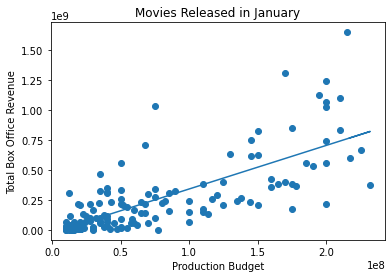

In [34]:
#June Comparison
xg = jun_df["production_budget"]
yg = jun_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in June")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.68
The linear regression line equation is y = 3.28x + 17473221.48


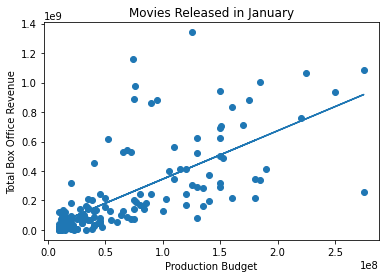

In [33]:
#July Comparison
xg = jul_df["production_budget"]
yg = jul_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in July")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.79
The linear regression line equation is y = 2.69x + -4215101.96


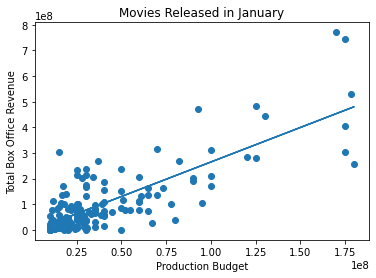

In [32]:
#August Comparison
xg = aug_df["production_budget"]
yg = aug_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in August")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.52
The linear regression line equation is y = 2.08x + 4369850.06


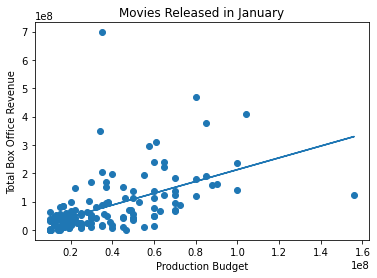

In [31]:
#September Comparison
xg = sep_df["production_budget"]
yg = sep_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in September")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.61
The linear regression line equation is y = 2.32x + 2216955.97


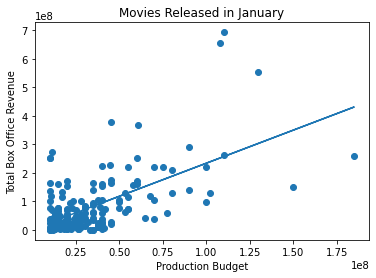

In [30]:
#October Comparison
xg = oct_df["production_budget"]
yg = oct_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in October")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.76
The linear regression line equation is y = 3.27x + 3209708.85


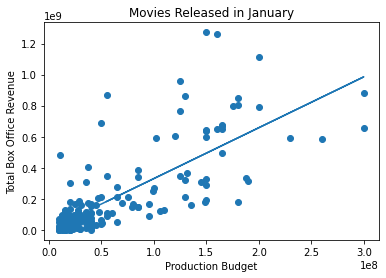

In [29]:
#November Comparison
xg = nov_df["production_budget"]
yg = nov_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in November")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()

The correlation coefficient is 0.85
The linear regression line equation is y = 4.5x + -61705865.84


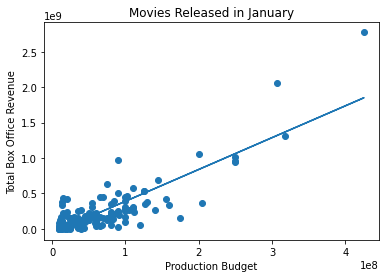

In [28]:
#December Comparison
xg = dec_df["production_budget"]
yg = dec_df["Total Box Office"]
plt.scatter(xg, yg)
plt.xlabel("Production Budget")
plt.ylabel("Total Box Office Revenue")
plt.title("Movies Released in December")
correlationG = st.pearsonr(xg,yg)
m, b = np.polyfit(xg, yg, 1)
plt.plot(xg, m*xg + b)
line_eq_G = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationG[0],2)))
print("The linear regression line equation is " + line_eq_G)
plt.show()